Spam SMS Detection

Overview

This Jupyter Notebook implements a Spam SMS Detection System using Natural Language Processing (NLP) and Machine Learning techniques. The goal is to classify SMS messages as spam or ham (not spam).

Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Loading the Dataset

In [20]:
# Load dataset
df = pd.read_csv("spam.csv", encoding="latin-1")
df = df.iloc[:, :2]  # Keep only the relevant columns
df.columns = ["label", "message"]  # Rename columns

In [21]:
# Convert labels to binary (spam = 1, ham = 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

Visualizing the Spam vs Ham Distribution

C:\Users\lavan\AppData\Local\Temp\ipykernel_20452\3944293686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['label'], palette=['#1f77b4', '#ff7f0e'])


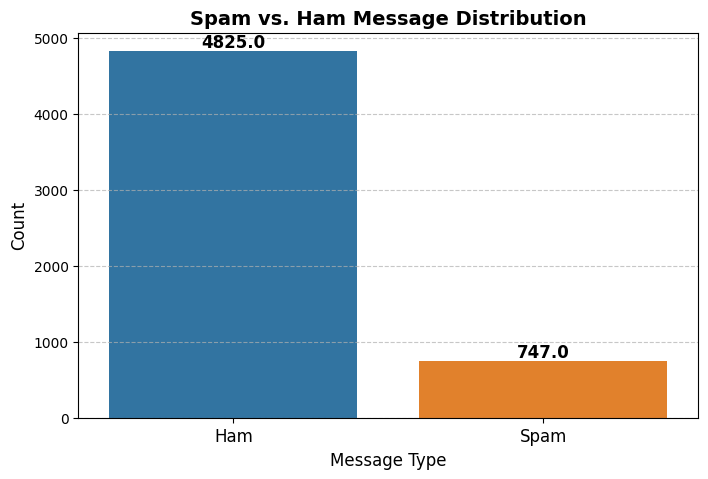

In [ ]:
# --- Spam vs. Ham Distribution ---
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['label'], palette=['#1f77b4', '#ff7f0e'])

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Title & Labels
plt.title("Spam vs. Ham Message Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Message Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ["Ham", "Spam"], fontsize=12)

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Text Cleaning and Preprocessing

In [23]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

In [24]:
# Apply text preprocessing
df['message'] = df['message'].apply(preprocess_text)

Visualizing the Spam Messages and Ham Messages

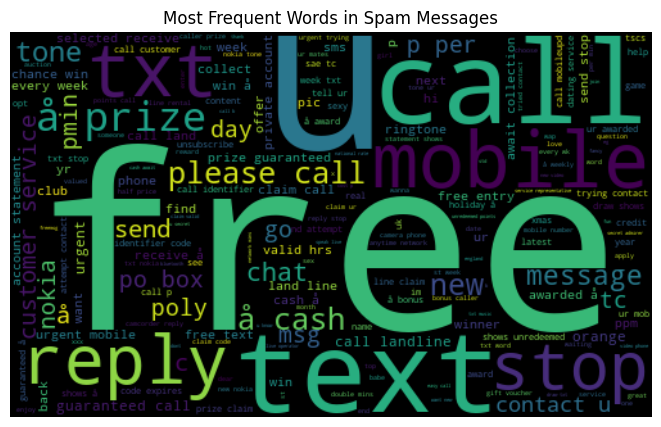

In [ ]:
# ---Word Cloud for Spam Messages ---
spam_words = ' '.join(df[df['label'] == 1]['message'])
wordcloud_spam = WordCloud(width=500, height=300, background_color='black').generate(spam_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Spam Messages")
plt.show()

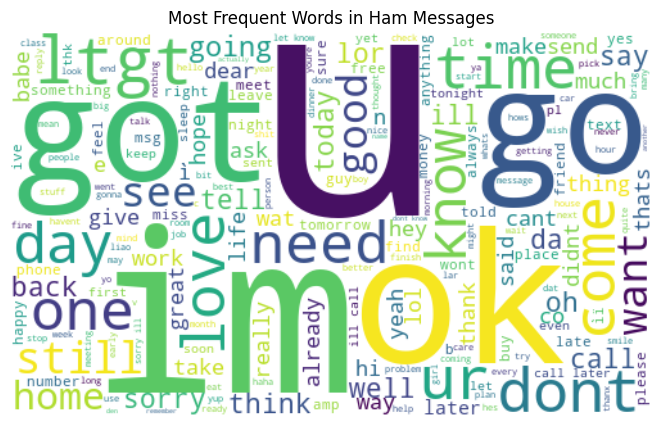

In [ ]:
# --- Word Cloud for Ham Messages ---
ham_words = ' '.join(df[df['label'] == 0]['message'])
wordcloud_ham = WordCloud(width=500, height=300, background_color='white').generate(ham_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Ham Messages")
plt.show()

Split Dataset into Train and Test sets

In [27]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [28]:
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Train using Naive Bayes Classifier

In [62]:
# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [63]:
# Make predictions
nb_preds = nb_model.predict(X_test_tfidf)

In [64]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("\nClassification Report:\n", classification_report(y_test, nb_preds))

Accuracy: 0.968609865470852

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



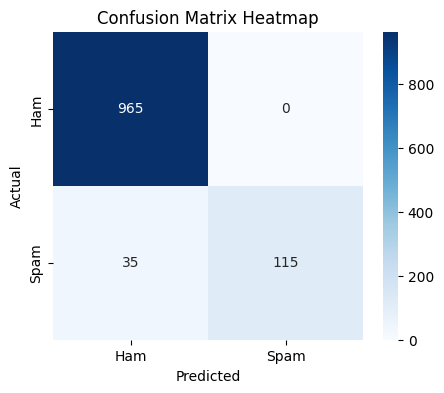

In [ ]:
conf_matrix = confusion_matrix(y_test, nb_preds)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

Train SVM model

In [33]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [37]:
# Train Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)  

In [38]:
accuracy = accuracy_score(y_test, svm_preds)
print(f"SVM Model Accuracy: {accuracy * 100:.2f}%")

SVM Model Accuracy: 97.76%


In [39]:
print("SVM Classification Report:\n", classification_report(y_test, svm_preds))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



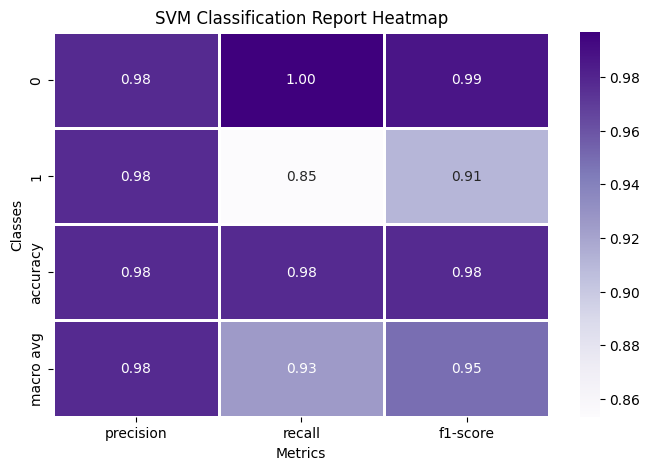

In [ ]:
# Generate classification report as a dictionary
svm_report = classification_report(y_test, svm_preds, output_dict=True)

# Convert the dictionary to a DataFrame
svm_report_df = pd.DataFrame(svm_report).T

plt.figure(figsize=(8, 5))
sns.heatmap(svm_report_df.iloc[:-1, :-1], annot=True, cmap="Purples", fmt=".2f", linewidths=1)
plt.title("SVM Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

Train Random Forest Model

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)

In [42]:
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Model Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Model Accuracy: 97.49%


In [ ]:
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



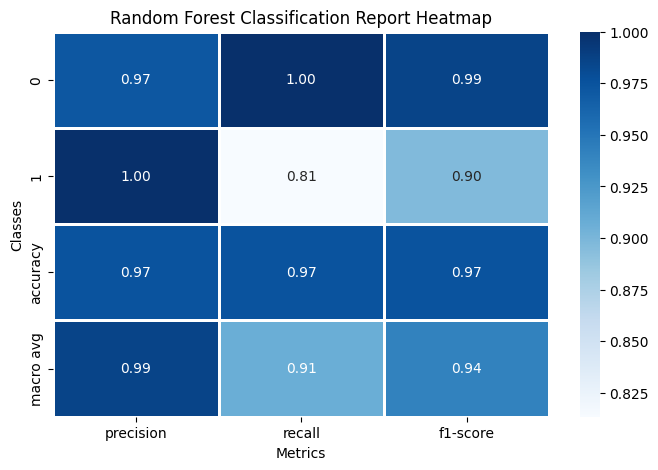

In [ ]:
rf_report = classification_report(y_test, rf_preds, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).T

plt.figure(figsize=(8, 5))
sns.heatmap(rf_report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1)
plt.title("Random Forest Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

Visualizing Feature Importance for Random Forest

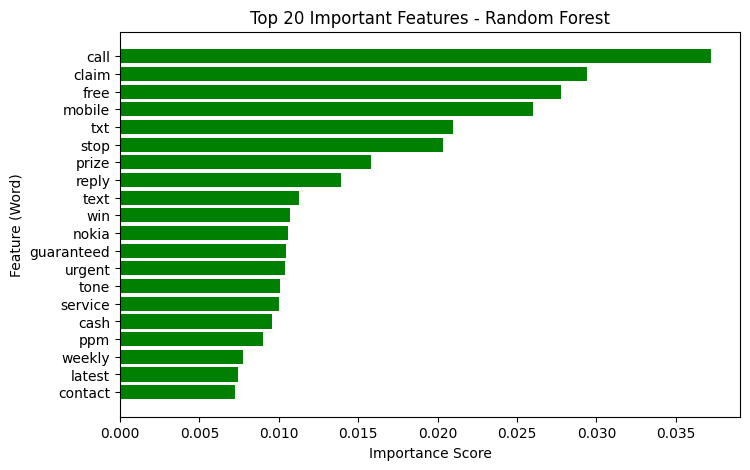

In [67]:
import numpy as np

# Get feature importance scores
feature_importance = rf_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Sort top 20 important features
indices = np.argsort(feature_importance)[-20:]
top_features = np.array(feature_names)[indices]
top_importance = feature_importance[indices]

# Plot
plt.figure(figsize=(8, 5))
plt.barh(top_features, top_importance, color='green')
plt.xlabel("Importance Score")
plt.ylabel("Feature (Word)")
plt.title("Top 20 Important Features - Random Forest")
plt.show()


Hyperparameter Tuning

In [45]:
# Hyperparameter tuning for SVM using GridSearchCV
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(probability=True), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_tfidf, y_train)

print("Best SVM Parameters:", svm_grid.best_params_)
print("Best SVM Accuracy:", svm_grid.best_score_)

Best SVM Parameters: {'C': 1, 'kernel': 'linear'}
Best SVM Accuracy: 0.9786836979662091


In [46]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_tfidf, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest Accuracy:", rf_grid.best_score_)

Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 200}
Best Random Forest Accuracy: 0.972849571952711


Model Comparison (SVM vs RF vs NB)

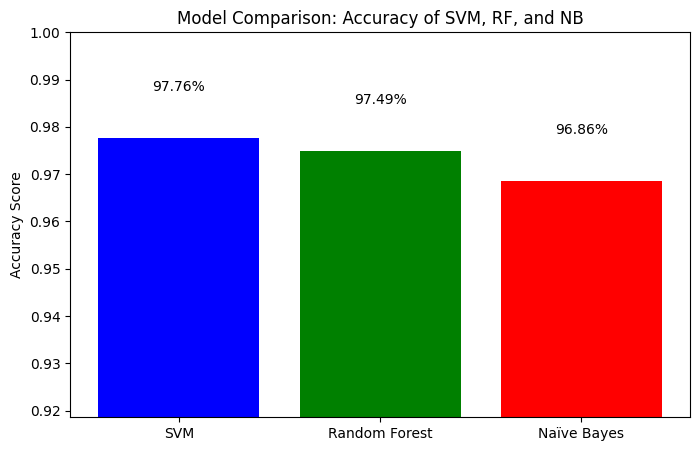

In [60]:
import matplotlib.pyplot as plt

# Define models and accuracy scores
models = ["SVM", "Random Forest", "Naïve Bayes"]
accuracies = [svm_accuracy, rf_accuracy, nb_accuracy]  # Use calculated accuracy scores

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Labels & title
plt.ylabel("Accuracy Score")
plt.title("Model Comparison: Accuracy of SVM, RF, and NB")
plt.ylim(min(accuracies) - 0.05, 1)  # Adjust Y-axis for clarity

# Show values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc*100:.2f}%", ha='center', fontsize=10)

plt.show()


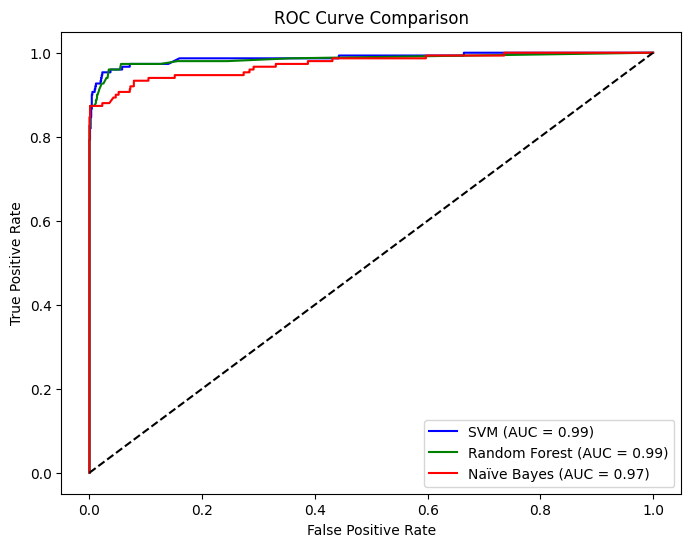

In [65]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curves
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test_tfidf)[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_tfidf)[:,1])
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test_tfidf)[:,1])

# Compute AUC scores
svm_auc = auc(svm_fpr, svm_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
nb_auc = auc(nb_fpr, nb_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_auc:.2f})", color='blue')
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color='green')
plt.plot(nb_fpr, nb_tpr, label=f"Naïve Bayes (AUC = {nb_auc:.2f})", color='red')

# Diagonal reference line (random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# Labels & Title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


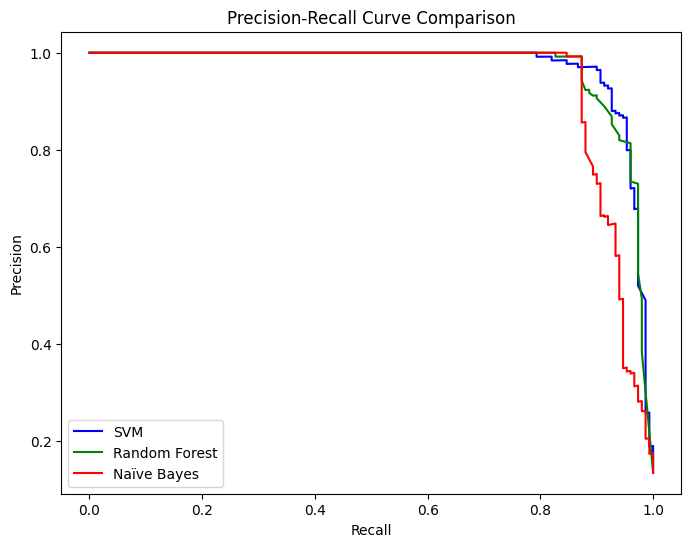

In [66]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curves
svm_prec, svm_recall, _ = precision_recall_curve(y_test, svm_model.predict_proba(X_test_tfidf)[:,1])
rf_prec, rf_recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test_tfidf)[:,1])
nb_prec, nb_recall, _ = precision_recall_curve(y_test, nb_model.predict_proba(X_test_tfidf)[:,1])

# Plot PR curves
plt.figure(figsize=(8, 6))
plt.plot(svm_recall, svm_prec, label="SVM", color='blue')
plt.plot(rf_recall, rf_prec, label="Random Forest", color='green')
plt.plot(nb_recall, nb_prec, label="Naïve Bayes", color='red')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()
